In [1]:
import requests
import json
import re
#import pycountry
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from pathlib import Path

## Apple

In [2]:
appledf = pd.read_csv("../websitedata/appletopsongsinternational2023.csv")
#print(appledf.shape)
print(type(appledf))

appledf.dropna

appledf = pd.melt(appledf, id_vars=["Pos", "P+", "Artist and Title", "Days", "Pk", "(x?)", "Pts", "Pts+", "TPts"], 
                   var_name="country", value_name="country_rank").dropna()

#print(appledf.isnull().sum())
#print(appledf.isna().sum())

appledf = appledf.drop(columns=["P+", "Pts+", "TPts"])
appledf = appledf.rename(columns={"Pos": "Chart Position","Days": "Duration (Days)", "Pk": "Peak", 
                                  "Pts": "Points", "country": "Country", "country_rank": "Country Rank"})

#print(appledf["(x?)"].value_counts())

appledf["(x?)"] = appledf["(x?)"].str.replace(r'[()]|x', "", regex = True)
#appledf = appledf[appledf["Country"].str.contains("^US", na=False)]


print(appledf)
#appledf.to_csv("../websitedata/apple_py.csv")
print(appledf.shape)


<class 'pandas.core.frame.DataFrame'>
       Chart Position                     Artist and Title  Duration (Days)  \
0                   1        Doja Cat - Paint The Town Red               68   
1                   2                  Tate McRae - greedy               27   
2                   3                        Drake - IDGAF                6   
3                   4         Drake - First Person Shooter                6   
4                   5               Drake - Virginia Beach                6   
...               ...                                  ...              ...   
11747               7          Taylor Swift - Cruel Summer              245   
11770              30  Billie Eilish - What Was I Made For               90   
11773              33             Taylor Swift - Anti-Hero              356   
11802              62                 Taylor Swift - Lover              412   
11810              70                      SZA - Kill Bill              307   

       Peak (

## Spotify

In [3]:
spotifydf = pd.read_csv("../websitedata/Spotify.csv")
#print(type(spotifydf))


#spotifydf.dropna
#print(spotifydf.isnull().sum())
#print(spotifydf.isna().sum())

spotifydf = spotifydf.rename(columns={"artist_name": "Artist Name","track_name": "Track Name", 
                                      "danceability": "Danceability", "energy": "Energy", "loudness": "Loudness",
                                      "speechiness": "Speechiness", "acousticness": "Acousticness",
                                      "liveness": "Liveness", "tempo": "Tempo", "album_name": "Album Name", 
                                      "album_release_year": "Album Release Year"})

print(spotifydf.head)
spotifydf.to_csv("../websitedata/spotify_py.csv")
print(spotifydf.shape)


<bound method NDFrame.head of      Unnamed: 0     Artist Name  Valence  Danceability  Energy  Loudness  \
0             1        Doja Cat    0.726         0.864   0.556    -7.683   
1             2        Doja Cat    0.313         0.831   0.362    -6.085   
2             3        Doja Cat    0.192         0.804   0.656    -5.723   
3             4        Doja Cat    0.643         0.764   0.720    -6.494   
4             5        Doja Cat    0.794         0.854   0.808    -5.958   
..          ...             ...      ...           ...     ...       ...   
388         389  Olivia Rodrigo    0.269         0.638   0.259   -10.706   
389         390  Olivia Rodrigo    0.338         0.395   0.443    -9.720   
390         391  Olivia Rodrigo    0.699         0.695   0.575    -6.334   
391         392  Olivia Rodrigo    0.218         0.369   0.272   -10.497   
392         393  Olivia Rodrigo    0.172         0.443   0.298   -12.181   

     Speechiness  Acousticness  Liveness    Tempo        

## Netflix

In [4]:
netflixdf = pd.read_csv("../websitedata/netflixWorld2022.csv")
#print(netflixdf.shape)
#print(type(netflixdf))

netflixdf = netflixdf.rename(columns={"Top TV shows on Netflix worldwide 2022": "Title", "Unnamed: 1": "Points"})


netflixdf.drop([0,1], inplace=True)
#print(netflixdf.isnull().sum())
#print(netflixdf.isna().sum())


print(netflixdf)
#netflixdf.to_csv("../websitedata/netflix_py.csv")
print(netflixdf.shape)

                                         Title  Points
2                              Stranger Things  63,800
3                                     Manifest  53,337
4                               Inventing Anna  34,393
5   Dahmer - Monster: The Jeffrey Dahmer Story  34,086
6                                   Bridgerton  30,229
7                                    Wednesday  30,102
8                      Café con aroma de mujer  28,765
9                          Pasión de gavilanes  27,591
10                          All of Us Are Dead  26,955
11                                   The Crown  25,874
12                  Extraordinary Attorney Woo  24,352
13                Pablo Escobar, The Drug Lord  24,273
14                                       Ozark  23,757
15                                 The Sandman  23,026
16                           Business Proposal  21,123
17                         Yo soy Betty la fea  20,912
18                                   Cobra Kai  20,786
19        

# Self- Reported Life Satisfaction

In [5]:
happygdp = pd.read_csv("../websitedata/gdp-vs-happiness.csv")

#print(happygdp.dtypes)
happygdp = happygdp[happygdp["Year"] == 2022] 
happygdp = happygdp.drop(["GDP per capita, PPP (constant 2017 international $)", 
                          "Population (historical estimates)",
                          "Continent", "Year"], axis=1)

happygdp = happygdp.rename(columns={"Cantril ladder score": "Score", "Unnamed: 7": "GDP"})

#print(happygdp.isna().sum())
print(happygdp.shape)
#happygdp.to_csv("../websitedata/happy_py.csv")
print(happygdp.head)

(137, 4)
<bound method NDFrame.head of             Entity Code   Score        GDP
1      Afghanistan  AFG  1.8590      363.7
597        Albania  ALB  5.2773   6,802.80
857        Algeria  DZA  5.3291   4,273.90
2133     Argentina  ARG  6.0237  13,686.00
2393       Armenia  ARM  5.3417   7,014.20
...            ...  ...     ...        ...
56105   Uzbekistan  UZB  6.0143   2,255.20
56816    Venezuela  VEN  5.2106  15,975.70
57076      Vietnam  VNM  5.7633   4,163.50
58181       Zambia  ZMB  3.9822   1,487.90
58442     Zimbabwe  ZWE  3.2035   1,267.00

[137 rows x 4 columns]>


# Exploring Data Tab

In [6]:
#print(appledf.describe())

newAppledf = appledf.drop(["Artist and Title", "Country"], axis=1)
newAppledf = newAppledf.reset_index(drop=True)

print(newAppledf.describe())

       Chart Position  Duration (Days)        Peak        Points  Country Rank
count      836.000000       836.000000  836.000000    836.000000    836.000000
mean        42.502392       308.492823    1.671053   7506.009569     61.480861
std         49.812835       427.604273    0.724705   5080.042094     52.836577
min          1.000000         6.000000    1.000000   1056.000000      1.000000
25%          5.000000        68.000000    1.000000   2739.000000     16.000000
50%         30.000000       132.000000    2.000000   5425.000000     48.500000
75%         62.000000       393.000000    2.000000  12359.000000     93.000000
max        198.000000      1982.000000    3.000000  16920.000000    200.000000


In [7]:
newAppledf["(x?)"] = newAppledf["(x?)"].astype(int)
newAppledf["Country Rank"] = newAppledf["Country Rank"].astype(int)
print(newAppledf.dtypes)
#newAppledf.to_csv("../websitedata/newApple_py.csv")

# Summary
print(newAppledf.describe())

# Correlation
print(newAppledf.corr())

Chart Position     int64
Duration (Days)    int64
Peak               int64
(x?)               int32
Points             int64
Country Rank       int32
dtype: object
       Chart Position  Duration (Days)        Peak        (x?)        Points  \
count      836.000000       836.000000  836.000000  836.000000    836.000000   
mean        42.502392       308.492823    1.671053   32.011962   7506.009569   
std         49.812835       427.604273    0.724705   47.504048   5080.042094   
min          1.000000         6.000000    1.000000    1.000000   1056.000000   
25%          5.000000        68.000000    1.000000    3.000000   2739.000000   
50%         30.000000       132.000000    2.000000   14.000000   5425.000000   
75%         62.000000       393.000000    2.000000   32.000000  12359.000000   
max        198.000000      1982.000000    3.000000  177.000000  16920.000000   

       Country Rank  
count    836.000000  
mean      61.480861  
std       52.836577  
min        1.000000  
25%  

Unnamed: 0     int64
Title         object
Points        object
dtype: object
       Unnamed: 0
count   25.000000
mean    14.000000
std      7.359801
min      2.000000
25%      8.000000
50%     14.000000
75%     20.000000
max     26.000000


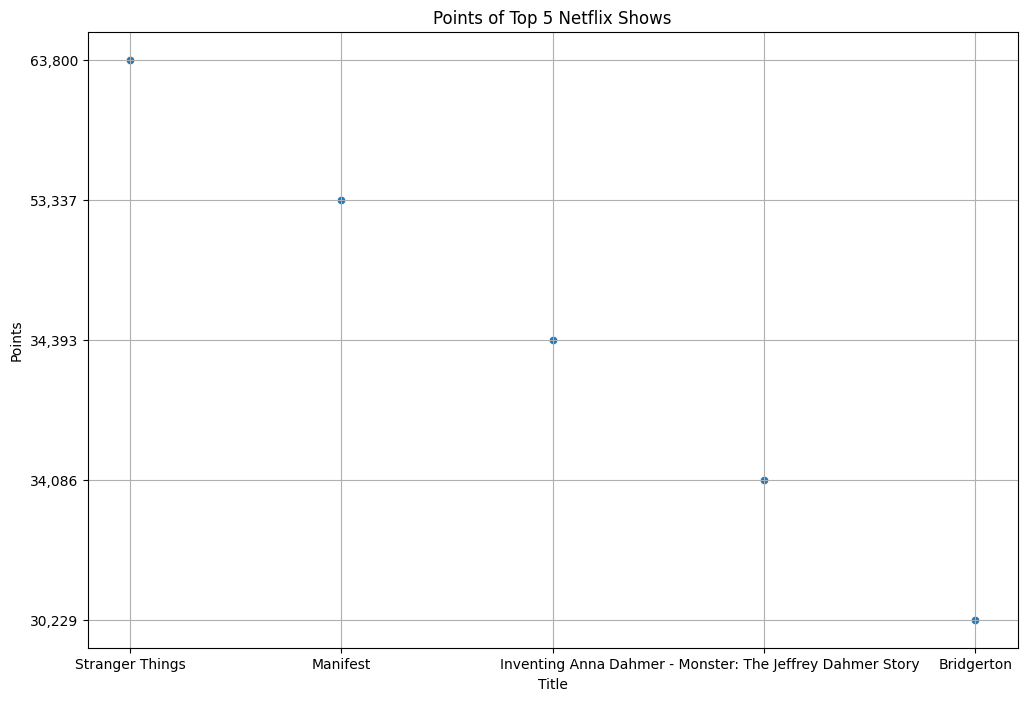

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

netflixdf = pd.read_csv("../websitedata/netflix_py.csv")
print(netflixdf.dtypes)
print(netflixdf.describe())

net5 = netflixdf.head(5)
#netshow = net5["Title"]
#netval = net5["Points"]

plt.figure(figsize=(12,8))
sns.scatterplot(x="Title",y="Points",data=net5)
plt.title("Points of Top 5 Netflix Shows")
plt.grid(True)
plt.show()

In [9]:
spotifydf = pd.read_csv("../websitedata/spotify_py.csv")
#print(spotifydf.dtypes)

newspotdf = spotifydf.drop(columns={"Unnamed: 0.1", "Unnamed: 0", "Artist Name", "Track Name", "Album Name"})

# Summary
print(newspotdf.describe())


          Valence  Danceability      Energy    Loudness  Speechiness  \
count  393.000000    393.000000  393.000000  393.000000   393.000000   
mean     0.384960      0.662466    0.564512   -7.636957     0.186602   
std      0.212783      0.150736    0.168313    2.881555     0.141246   
min      0.036100      0.193000    0.021800  -31.160000     0.025400   
25%      0.214000      0.547000    0.452000   -9.013000     0.066800   
50%      0.355000      0.683000    0.555000   -7.355000     0.140000   
75%      0.530000      0.780000    0.688000   -5.786000     0.274000   
max      0.949000      0.934000    0.922000   -2.176000     0.883000   

       Acousticness    Liveness       Tempo  Album Release Year  
count    393.000000  393.000000  393.000000          393.000000  
mean       0.243078    0.183383  121.734425         2017.885496  
std        0.254899    0.134848   30.877509            4.164919  
min        0.000052    0.028600   65.041000         2009.000000  
25%        0.038600  

In [10]:
# Correlation
print(newspotdf.corr())

                     Valence  Danceability    Energy  Loudness  Speechiness  \
Valence             1.000000      0.246692  0.398002  0.307874     0.040146   
Danceability        0.246692      1.000000 -0.041714  0.128736    -0.079113   
Energy              0.398002     -0.041714  1.000000  0.717260     0.179141   
Loudness            0.307874      0.128736  0.717260  1.000000     0.059715   
Speechiness         0.040146     -0.079113  0.179141  0.059715     1.000000   
Acousticness       -0.034774     -0.349418 -0.385829 -0.376252    -0.040905   
Liveness           -0.041324     -0.066942  0.130201  0.082523     0.161238   
Tempo               0.050777     -0.063817  0.135110  0.086825     0.117097   
Album Release Year  0.048786      0.154002 -0.074721  0.072098    -0.252975   

                    Acousticness  Liveness     Tempo  Album Release Year  
Valence                -0.034774 -0.041324  0.050777            0.048786  
Danceability           -0.349418 -0.066942 -0.063817       

In [11]:
import pandas as pd

happygdp = pd.read_csv("../websitedata/happy_py.csv")

happygdp["GDP"] = happygdp["GDP"].str.replace(',', '').astype(float)
#print(happygdp.dtypes)

lifesat = happygdp.drop(columns={"Entity", "Code", "Unnamed: 0"})

#summary
print(lifesat.describe()) 
#correlation
print(lifesat.corr())

            Score            GDP
count  137.000000     137.000000
mean     5.539755   18187.739781
std      1.139908   24494.805589
min      1.859000     363.700000
25%      4.723900    2255.200000
50%      5.684300    6776.500000
75%      6.333800   24826.800000
max      7.804200  126426.100000
          Score       GDP
Score  1.000000  0.695397
GDP    0.695397  1.000000
